## _Natural Language Processing_ 
### _Help Twitter Combat Hate Speech Using NLP and Machine Learning_
***
<b>DESCRIPTION</b>

Using NLP and ML, make a model to identify hate speech in Twitter.

<b>Problem Statement:</b>
***

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

<b>Analysis to be done:</b> Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

<b>Content: </b>

id: identifier number of the tweet

Label: (non-hate) / (hate)

Tweet: the text in the tweet
***

<b>Tasks: </b>

Load the tweets file using read_csv function from Pandas package. 

Get the tweets into a list for easy text cleanup and manipulation.

<b>To cleanup: </b>

- Normalize the casing.
- Using regular expressions, remove user handles. These begin with '@’.
- Using regular expressions, remove URLs.
- Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
- Remove stop words.
- Remove redundant terms like ‘amp’, ‘rt’, etc.
- Remove ‘#’ symbols from the tweet while retaining the term.
- Extra cleanup by removing terms with a length of 1.


<a id='1'></a>
## _Import Libraries and Load Data_

In [1]:
#general packages for data manipulation
import os
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
%pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#import texthero
#import texthero as hero
#regular expressions
import re
#display pandas dataframe columns 
pd.options.display.max_columns = None


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Nino\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
#load the csv file as a pandas dataframe
#ISO-8859-1
tweet = pd.read_csv(r'C:\Users\Nino\Documents\hateDetection-ETH\dataset\augmented_dataset_with_profanities.csv',delimiter=',',engine='python',encoding='utf-8-sig')
tweet.head()

,text,label
0,Yes folks there was a time Manchester United g...,hate
1,What s INEOS waiting for? Erik ten Hag got to ...,no-hate
2,Saka is the type of player Erik Ten Hag needs ...,no-hate
3,@ScholesEvilTwin No Erik ten Hag. They are ste...,no-hate
4,@LukeShawArmy Erik Ten Hag London Stadium is n...,no-hate


In [3]:
#view one of the tweets randomly 
random = np.random.randint(0,len(tweet))
print(random)
tweet.iloc[random]['text']

632


'Repost in solidarity for Erik Ten Hag.. Manchester United trust the process. https://t.co/nc7tGoV5ts""'

In [4]:
#create a copy of the original data to work with 
df = tweet.copy()

<a id='2'></a>
## _Text Cleaning_

<a name='2-1'></a>
### _Handle Diacritics using text normalization_

In [5]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [6]:
df['text'] = df['text'].apply(simplify)

<a id='2-2'></a>
### _Remove user handles_

In [7]:
#test on a sample string
sample = "Erik Ten Hag reacts to West Ham defeat https://t.co/cZStBZaiW3 via @YouTube @M53Irons"
pattern = re.compile(r'@\w+')
re.findall(pattern,sample)

['@YouTube', '@M53Irons']

In [8]:
#remove all the user handles --> strings starting with @
df['text'].replace(r'@\w+','',regex=True,inplace=True)

<a id='2-3'></a>
### _Remove the urls_

In [9]:
#test on a sample 
sample = "Erik Ten Hag reacts to West Ham defeat https://t.co/cZStBZaiW3 via @YouTube @M53Irons"
pattern = re.compile(r'http\S+')
re.findall(pattern,sample)

['https://t.co/cZStBZaiW3']

In [10]:
df['text'].replace(r'http\S+','',regex=True,inplace=True)

<a id='2-4'></a>
### _Tokenize using tweet tokenizer_

In [11]:
#test on a sample text
sample = 'fuck eth the worst manager ever :-('
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['fuck', 'eth', 'the', 'worst', 'manager', 'ever', ':-(']

In [12]:
#tokenize the tweets in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df['text'] = df['text'].apply(tokenizer.tokenize)

In [13]:
#view the tokenized tweets
df.head(3)

,text,label
0,"[Yes, folks, there, was, a, time, Manchester, ...",hate
1,"[What, s, INEOS, waiting, for, ?, Erik, ten, H...",no-hate
2,"[Saka, is, the, type, of, player, Erik, Ten, H...",no-hate


<a id='2-5'></a>
### _Remove Stopwords_
_Append more words to be removed from the text - example rt and amp which occur very frequently_

In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Load the stopwords
stop_words = stopwords.words('english')

# Add additional stopwords to the list
additional_list = ['amp', 'rt', 'u', "can't", 'ur', 'eth','Erik', 'erik', 'ten','Ten','Hag', 'hag', 'mu', 'man', 'united', 'manchester']
stop_words.extend(additional_list)  # Extend the list instead of appending individually


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop_words[-20:]

['won',
 "won't",
 'wouldn',
 "wouldn't",
 'amp',
 'rt',
 'u',
 "can't",
 'ur',
 'eth',
 'Erik',
 'erik',
 'ten',
 'Ten',
 'Hag',
 'hag',
 'mu',
 'man',
 'united',
 'manchester']

In [16]:
#remove stop words
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words]
    return clean_text    

In [17]:
#remove the stop words from the tweets
df['text'] = df['text'].apply(remove_stopwords)

In [18]:
df['text'].head()

0    [Yes, folks, time, Manchester, United, got, ee...
1    [What, INEOS, waiting, ?, got, go, ., Aren, Ar...
2    [Saka, type, player, needs, team, ., Direct, p...
3    [No, ., They, steadily, rebuilding, squad, ., ...
4    [London, Stadium, never, easy, game, proud, ch...
Name: text, dtype: object

<a id='2-6'></a>
### _Spelling corrections_

In [19]:
#apply spelling correction on a sample text
# %pip install textblob
from textblob import TextBlob
sample = 'i supprt manchestr united and erik ten hag is the best manager evr'
txtblob = TextBlob(sample)
corrected_text = txtblob.correct()
print(corrected_text)

i support manchester united and erie ten had is the best manager ever


In [20]:
#textblob expect a string to be passed and not a list of strings
from textblob import TextBlob

def spell_check(text):
    '''Function to do spelling correction using '''
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return corrected_text
    

<a id='2-7'></a>
### _Remove # symbols while retaining the text_

In [21]:
#try tremoving # symbols from a sample text
sample = '#eth #mu #manchester'
pattern = re.compile(r'#')
re.sub(pattern,'',sample)

'eth mu manchester'

In [22]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)    

In [23]:
df['text'] = df['text'].apply(remove_hashsymbols)

In [24]:
df.head(10)

,text,label
0,"[Yes, folks, time, Manchester, United, got, ee...",hate
1,"[What, INEOS, waiting, ?, got, go, ., Aren, Ar...",no-hate
2,"[Saka, type, player, needs, team, ., Direct, p...",no-hate
3,"[No, ., They, steadily, rebuilding, squad, ., ...",no-hate
4,"[London, Stadium, never, easy, game, proud, ch...",no-hate
5,"[I, thought, -, actually, well, another, club,...",no-hate
6,"[Are, seriously, comparing, Hansi, Flick, ?, E...",no-hate
7,"[We, played, good, ..., So, I, criticize, team...",no-hate
8,"[Hag's, Man, United, WON, Just, 3, Their, 14, ...",hate
9,"[VAR, controversy, gives, another, way, blame,...",no-hate


<a id='2-8'></a>
### _Remove single and double length characters_

In [25]:
def rem_shortwords(text):
    '''Function to remove the short words of length 1 and 2 characters'''
    '''Arguments: 
       text: string
       returns: string without containing words of length 1 and 2'''
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]
        
    return new_text       
    

In [26]:
df['text'] = df['text'].apply(rem_shortwords)

In [27]:
df.head(5)

,text,label
0,Yes folks time Manchester United got eelegated...,hate
1,What INEOS waiting ? got go . Aren Arsenal tit...,no-hate
2,Saka type player needs team . Direct purposefu...,no-hate
3,"No . They steadily rebuilding squad . "" """,no-hate
4,London Stadium never easy game proud chances c...,no-hate


In [28]:
df['text'] = df['text'].apply(tokenizer.tokenize)

In [29]:
df.head(5)

,text,label
0,"[Yes, folks, time, Manchester, United, got, ee...",hate
1,"[What, INEOS, waiting, ?, got, go, ., Aren, Ar...",no-hate
2,"[Saka, type, player, needs, team, ., Direct, p...",no-hate
3,"[No, ., They, steadily, rebuilding, squad, ., ...",no-hate
4,"[London, Stadium, never, easy, game, proud, ch...",no-hate


<a id='2-9'></a>
### _Remove digits_

In [30]:
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)   

In [31]:
df['text'] = df['text'].apply(rem_digits)

In [32]:
df['text'] = df['text'].apply(tokenizer.tokenize)

In [33]:
df.head()

,text,label
0,"[Yes, folks, time, Manchester, United, got, ee...",hate
1,"[What, INEOS, waiting, ?, got, go, ., Aren, Ar...",no-hate
2,"[Saka, type, player, needs, team, ., Direct, p...",no-hate
3,"[No, ., They, steadily, rebuilding, squad, ., ...",no-hate
4,"[London, Stadium, never, easy, game, proud, ch...",no-hate


<a id='2-10'></a>
### _Remove special characters_


In [34]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [35]:
#remove the non alpha numeric characters from the text tokens
df['text'] = df['text'].apply(rem_nonalpha)

<a id='3'></a>
## _Exploratory Data Analysis - Broad Approach_

<a id='3-1'></a>
### _Check for data balance_

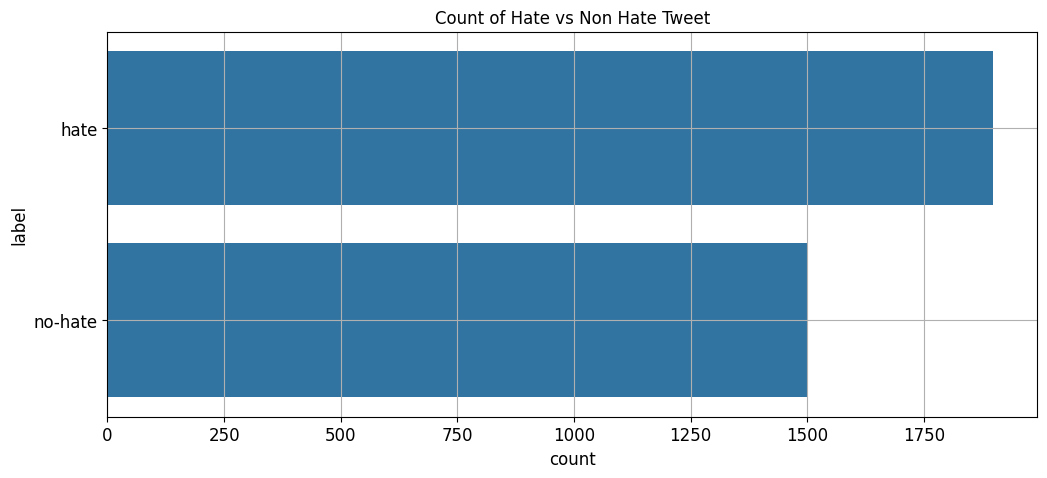

In [36]:
#plot of the count of hate and non hate tweet
sns.countplot(df['label'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

_There are more hatespeech than the non hatespeech in the dataset_

<a id='3-2'></a>
### _Check out the top terms in the tweets_

In [37]:
from collections import Counter
results = Counter()
df['text'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('You', 1656), ('United', 487), ('I', 411), ('Manchester', 401), ('West', 310), ('Man', 279), ('Ham', 268), ('MUFC', 208), ('Utd', 182), ('team', 172)]


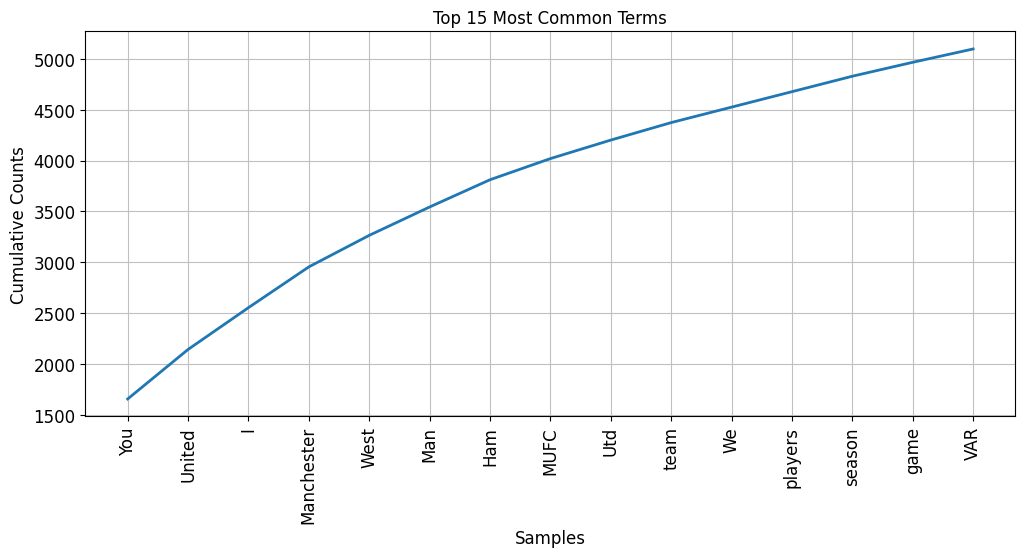

In [38]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 15 Most Common Terms')
frequency.plot(15,cumulative=True)
plt.show()

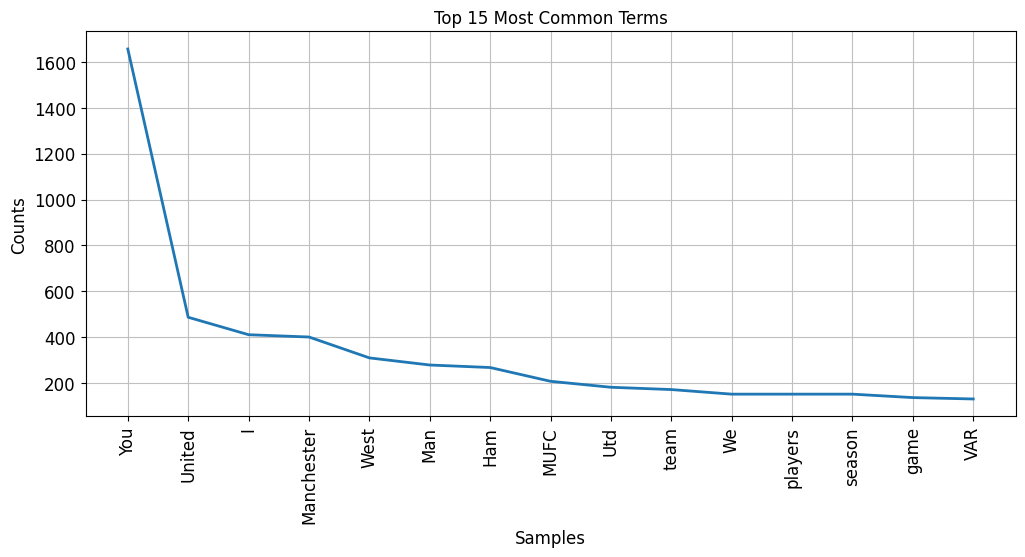

In [39]:
#plot the frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 15 Most Common Terms')
frequency.plot(15,cumulative=False)
plt.show()

_Love is the most frequently used word followed by day, happy etc. This is expected as there are more non hate tweets than hate tweets in the dataset_

<a id='4'></a>
## _Predictive Modeling_

### _Data Formatting for Predictive Modeling_

In [40]:
df.head()

,text,label
0,"[Yes, folks, time, Manchester, United, got, ee...",hate
1,"[What, INEOS, waiting, got, go, Aren, Arsenal,...",no-hate
2,"[Saka, type, player, needs, team, Direct, purp...",no-hate
3,"[No, They, steadily, rebuilding, squad]",no-hate
4,"[London, Stadium, never, easy, game, proud, ch...",no-hate


In [41]:
#check for the null values
df.isnull().sum()

text     0
label    0
dtype: int64

In [42]:
#join the tokens back to form the string
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [43]:
#check the top rows
df.head(3)

,text,label
0,Yes folks time Manchester United got eelegated...,hate
1,What INEOS waiting got go Aren Arsenal title h...,no-hate
2,Saka type player needs team Direct purposeful,no-hate


In [44]:
#split the data into input X and output y
X = df['text']
y = df['label']

In [45]:
#split the data 
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.2 #20% of the data in the 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2718,) (680,) (2718,) (680,)


In [57]:
from sklearn.model_selection import train_test_split

# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi jumlah data
print(f"Jumlah data latih: {len(X_train)}")  # Harus sekitar 2720
print(f"Jumlah data uji: {len(X_test)}")    # Harus sekitar 680


Jumlah data latih: 2718
Jumlah data uji: 680


<a id='4-2'></a>
### _Use tf-idf as a feature to get into the vector space model_


In [46]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [47]:
#instantiate the vectorizer 
vectorizer = TfidfVectorizer(max_features=5000)

In [48]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

In [49]:
#check the shape
X_train.shape, X_test.shape

((2718, 2630), (680, 2630))

Confusion Matrix:
[[358  22]
 [  0 300]]


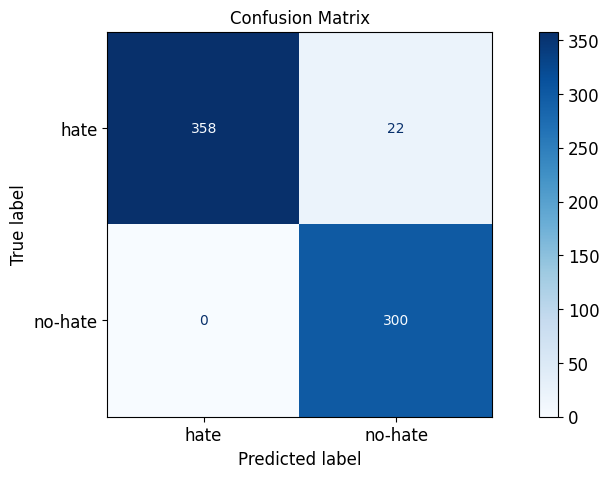


Classification Report:
              precision    recall  f1-score   support

        hate       1.00      0.94      0.97       380
     no-hate       0.93      1.00      0.96       300

    accuracy                           0.97       680
   macro avg       0.97      0.97      0.97       680
weighted avg       0.97      0.97      0.97       680

Accuracy: 0.9676470588235294


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Melatih model Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluasi model
y_pred = classifier.predict(X_test)

# Mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualisasi confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Optional: Jika ingin laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

score = classifier.score(X_test, y_test)
print('Accuracy:', score)

<a id='4-3'></a>
### _Model building: Ordinary Logistic Regression_